In [8]:
!pip install devex_sdk

In [9]:

from devex_sdk import setup_runner
setup_runner()

from devex_sdk import Spark_Data_Connector, Nested_Json_Connector
from pyspark.sql.functions import col, count
import pyspark.sql.functions as F
from devex_sdk import Spark_Data_Connector, Nested_Json_Connector
from pyspark.sql.functions import col, count
import pyspark.sql.functions as F

json_object_path = 'prometheus-tsdb-dump/df72.json'
obj = Nested_Json_Connector(json_object_path)
err, df1 = obj.read_nested_json()

b"Hit:1 http://deb.debian.org/debian buster InRelease\nHit:2 http://deb.debian.org/debian buster-updates InRelease\nHit:3 http://security.debian.org/debian-security buster/updates InRelease\nReading package lists...\nBuilding dependency tree...\nReading state information...\n62 packages can be upgraded. Run 'apt list --upgradable' to see them.\nReading package lists...\nBuilding dependency tree...\nReading state information...\nsudo is already the newest version (1.8.27-1+deb10u5).\n0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.\nReading package lists...\nBuilding dependency tree...\nReading state information...\ndefault-jre is already the newest version (2:1.11-71).\n0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.\nReading package lists...\nBuilding dependency tree...\nReading state information...\npython3 is already the newest version (3.7.3-1).\n0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.\nReading package lists...\nBuilding depend

/opt/conda/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


Nested_Json_Connector initialized with the following s3_file_path:prometheus-tsdb-dump/df72.json


In [16]:
from pyspark.sql import functions
from pyspark.sql.functions import expr,from_unixtime
df_date = df1.withColumn("date_col",  expr("transform(timestamps, x -> from_unixtime(x / 1000))"))
df_filter1 = df_date.filter(col("metric_pod").startswith('open5gs-amf-6d85b8c465-fzg2t')).select("metric_pod",'date_col','metric___name__','values').filter((col('metric___name__')=='container_memory_max_usage_bytes'))
df_filter1.show(df_filter1.count(),truncate=False)

+----------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
from devex_sdk import GzConnector

bucket= 'open5gs-respons-logs'
log_type = 'application'
cluster = 'respons-amf-forecaster'
year = '2023'
month = '06'
day = '06'  
hour = '15'


gzc = GzConnector(bucket=bucket, log_type=log_type, cluster=cluster, year=year, month=month, day=day, hour=hour)

df = gzc.read()

Getting paths...
Number of .gz file(s) to process: 1377
Getting objects...
Success. Number of objects == number of paths.
Processing objects...
Successfully processed objects.
Normalizing dataframe...
Successfully normalized dataframe.


In [ ]:
df

In [11]:
df_ = df

In [12]:
import pandas as pd
df['timestamp'] = pd.to_datetime(df['time'])

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.floor('S').dt.tz_localize(None)


In [14]:
pd.set_option('display.max_columns', None)
df

,data,date,time,stream,_p,log,kubernetes.pod_name,kubernetes.namespace_name,kubernetes.pod_id,kubernetes.host,kubernetes.container_name,kubernetes.docker_id,kubernetes.container_image,kubernetes.container_hash,log_processed.time,log_processed.level,log_processed.msg,log_processed.t.$date,log_processed.s,log_processed.c,log_processed.id,log_processed.ctx,log_processed.attr.remote,log_processed.attr.uuid,log_processed.attr.connectionId,log_processed.attr.connectionCount,log_processed.attr.opId,log_processed.attr.client,log_processed.attr.doc.driver.name,log_processed.attr.doc.driver.version,log_processed.attr.doc.os.type,log_processed.attr.doc.os.name,log_processed.attr.doc.os.architecture,log_processed.attr.doc.os.version,log_processed.attr.doc.platform,log_processed.attr.doc.version,log_processed.attr.doc.application.name,log_processed.attr.message,log_processed.attr.type,log_processed.attr.ns,log_processed.attr.command.find,log_processed.attr.command.filter.imsi,log_processed.attr.command.$db,log_processed.attr.command.lsid.id.$uuid,log_processed.attr.planSummary,log_processed.attr.keysExamined,log_processed.attr.docsExamined,log_processed.attr.cursorExhausted,log_processed.attr.numYields,log_processed.attr.nreturned,log_processed.attr.queryHash,log_processed.attr.planCacheKey,log_processed.attr.reslen,log_processed.attr.locks.FeatureCompatibilityVersion.acquireCount.r,log_processed.attr.locks.Global.acquireCount.r,log_processed.attr.locks.Mutex.acquireCount.r,log_processed.attr.protocol,log_processed.attr.durationMillis,timestamp
0,"{'date': '2023-06-06T14:59:33.551642Z', 'time'...",2023-06-06T14:59:33.551642Z,2023-06-06T14:59:33.551642604Z,stderr,F,[2023/06/06 14:59:33] [debug] [input chunk] up...,fluent-bit-tf9k9,m-and-m,5292b5df-5789-4db6-b551-5e9d06337528,ip-10-0-115-68.ec2.internal,fluent-bit,a8ef31bdb703073ab90de6f9b3459d3774a8d496f033f6...,public.ecr.aws/aws-observability/aws-for-fluen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 14:59:33
1,"{'date': '2023-06-06T14:59:33.551681Z', 'time'...",2023-06-06T14:59:33.551681Z,2023-06-06T14:59:33.551681564Z,stderr,F,[2023/06/06 14:59:33] [debug] [input chunk] up...,fluent-bit-tf9k9,m-and-m,5292b5df-5789-4db6-b551-5e9d06337528,ip-10-0-115-68.ec2.internal,fluent-bit,a8ef31bdb703073ab90de6f9b3459d3774a8d496f033f6...,public.ecr.aws/aws-observability/aws-for-fluen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 14:59:33
2,"{'date': '2023-06-06T14:59:33.551712Z', 'time'...",2023-06-06T14:59:33.551712Z,2023-06-06T14:59:33.551712879Z,stderr,F,[2023/06/06 14:59:33] [debug] [input chunk] up...,fluent-bit-tf9k9,m-and-m,5292b5df-5789-4db6-b551-5e9d06337528,ip-10-0-115-68.ec2.internal,fluent-bit,a8ef31bdb703073ab90de6f9b3459d3774a8d496f033f6...,public.ecr.aws/aws-observability/aws-for-fluen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 14:59:33
3,"{'date': '2023-06-06T14:59:33.551749Z', 'time'...",2023-06-06T14:59:33.551749Z,2023-06-06T14:59:33.551749518Z,stderr,F,[2023/06/06 14:59:33] [debug] [input chunk] up...,fluent-bit-tf9k9,m-and-m,5292b5df-5789-4db6-b551-5e9d06337528,ip-10-0-115-68.ec2.internal,fluent-bit,a8ef31bdb703073ab90de6f9b3459d3774a8d496f033f6...,public.ecr.aws/aws-observability/aws-for-fluen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 14:59:33
4,"{'date': '2023-06-06T14:59:33.551779Z', 'time'...",2023-06-06T14:59:33.551779Z,2023-06-06T14:59:33.551779998Z,stderr,F,[2023/06/06 14:59:33] [debug

In [15]:
df['kubernetes.pod_name'].unique()

array(['fluent-bit-tf9k9', 'fluent-bit-nmdl2',
       'prometheus-kube-prometheus-prometheus-0',
       'ueransim-gnb-7847b79b55-zp5q8',
       'ueransim-ues-second--batch-8bc868ddb-x9wtz',
       'ueransim-ues-first-batch-5d9b4b6f8b-9798d',
       'open5gs-mongodb-68947c4874-sl8sr',
       'ebs-csi-controller-564fc5bbf7-6b69m',
       'loki-stack-grafana-565b7f6689-7hfql', 'loki-stack-0',
       'ueransim-gnb-ues-6cbd645784-vj5zt',
       'ueransim-ues-first-batch-849cb6bb7d-4wxwf',
       'ueransim-ues-second--batch-559b767c75-2747p',
       'open5gs-pcf-bbdc99f79-c5x7g', 'open5gs-amf-54cc5d554b-pjq4v',
       'open5gs-nrf-9c84f89f9-dr7mj', 'open5gs-smf-7f94db58f7-c6qsd',
       'ueransim-gnb-cf7f9c5-49rfg', 'ueransim-gnb-ues-74569ffb7-hv8t5',
       'ueransim-ues-first-batch-59ffb76d57-zmf98',
       'ueransim-ues-second--batch-5b87b5bbb4-cnxhf',
       'open5gs-udr-5c7799bcd7-9pjbc', 'open5gs-udm-6465f98d46-qfwc7',
       'open5gs-ausf-6776cbc558-ljrx5', 'open5gs-upf-7756b89795-824

In [17]:
df_pod = df[df['kubernetes.pod_name']=='open5gs-amf-54cc5d554b-pjq4v']
df_pod

,data,date,time,stream,_p,log,kubernetes.pod_name,kubernetes.namespace_name,kubernetes.pod_id,kubernetes.host,kubernetes.container_name,kubernetes.docker_id,kubernetes.container_image,kubernetes.container_hash,log_processed.time,log_processed.level,log_processed.msg,log_processed.t.$date,log_processed.s,log_processed.c,log_processed.id,log_processed.ctx,log_processed.attr.remote,log_processed.attr.uuid,log_processed.attr.connectionId,log_processed.attr.connectionCount,log_processed.attr.opId,log_processed.attr.client,log_processed.attr.doc.driver.name,log_processed.attr.doc.driver.version,log_processed.attr.doc.os.type,log_processed.attr.doc.os.name,log_processed.attr.doc.os.architecture,log_processed.attr.doc.os.version,log_processed.attr.doc.platform,log_processed.attr.doc.version,log_processed.attr.doc.application.name,log_processed.attr.message,log_processed.attr.type,log_processed.attr.ns,log_processed.attr.command.find,log_processed.attr.command.filter.imsi,log_processed.attr.command.$db,log_processed.attr.command.lsid.id.$uuid,log_processed.attr.planSummary,log_processed.attr.keysExamined,log_processed.attr.docsExamined,log_processed.attr.cursorExhausted,log_processed.attr.numYields,log_processed.attr.nreturned,log_processed.attr.queryHash,log_processed.attr.planCacheKey,log_processed.attr.reslen,log_processed.attr.locks.FeatureCompatibilityVersion.acquireCount.r,log_processed.attr.locks.Global.acquireCount.r,log_processed.attr.locks.Mutex.acquireCount.r,log_processed.attr.protocol,log_processed.attr.durationMillis,timestamp
11136555,"{'date': '2023-06-06T15:47:27.444489Z', 'time'...",2023-06-06T15:47:27.444489Z,2023-06-06T15:47:27.444489594Z,stderr,F,Open5GS daemon v2.4.11,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 15:47:27
11136556,"{'date': '2023-06-06T15:47:27.444524Z', 'time'...",2023-06-06T15:47:27.444524Z,2023-06-06T15:47:27.444524569Z,stderr,F,,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 15:47:27
11136563,"{'date': '2023-06-06T15:47:27.448808Z', 'time'...",2023-06-06T15:47:27.448808Z,2023-06-06T15:47:27.44880817Z,stderr,F,[32m06/06 15:47:27.448[0m: [[33mapp[0m] [...,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 15:47:27
11136581,"{'date': '2023-06-06T15:47:27.568625Z', 'time'...",2023-06-06T15:47:27.568625Z,2023-06-06T15:47:27.56862546Z,stderr,F,[32m06/06 15:47:27.568[0m: [[33mmetrics[0m...,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-06 15:47:27
11136582,"{'date

In [32]:
df["kubernetes.pod_id"].iloc[1]

'5292b5df-5789-4db6-b551-5e9d06337528'

In [28]:
df_p = df

In [53]:
df_namespace = df_namespace[df_namespace['log_processed.msg'].notna()]

In [54]:
df_namespace['log_processed.msg'].unique()

array(['Connection ended', 'Connection accepted', 'client metadata',
       'Interrupted operation as its client disconnected',
       'WiredTiger message', 'Slow query'], dtype=object)

In [45]:
df_image['log_processed.msg'].iloc[1]

nan

In [24]:
df1

DataFrame[timestamps: array<bigint>, values: array<double>, metric___name__: string, metric_access_mode: string, metric_action: string, metric_address: string, metric_apiservice: string, metric_attacher: string, metric_bios_date: string, metric_bios_release: string, metric_bios_vendor: string, metric_bios_version: string, metric_board_asset_tag: string, metric_board_vendor: string, metric_boot_id: string, metric_bound: string, metric_branch: string, metric_broadcast: string, metric_build_date: string, metric_call: string, metric_cause: string, metric_chassis_asset_tag: string, metric_chassis_vendor: string, metric_cidr: string, metric_claim_namespace: string, metric_clocksource: string, metric_cluster_ip: string, metric_code: string, metric_code_path: string, metric_collector: string, metric_compiler: string, metric_component: string, metric_condition: string, metric_config: string, metric_configmap: string, metric_container: string, metric_container_id: string, metric_container_runtim

In [18]:
pod12 = df_date.filter(col("metric_pod").startswith('open5gs-amf-54cc5d554b-pjq4v')).select("metric_pod",'date_col','metric___name__','values').filter((col('metric___name__')=='container_memory_max_usage_bytes'))


In [28]:
from datetime import datetime
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
def get_pod(pod,valuename):
    
    x_values = pod.select("date_col").rdd.flatMap(lambda x: x).collect()
    y_values = pod.select("values").rdd.flatMap(lambda x: x).collect()
    pod = pod.select("metric_pod").rdd.flatMap(lambda x: x).collect()
    result_dict = {}
    for x_list, y_list in zip(x_values, y_values):
        for x, y in zip(x_list, y_list):
            if x in result_dict:
                result_dict[x] += y
            else:
                result_dict[x] = y

            
    result_dict = {
        datetime.strptime(key, '%Y-%m-%d %H:%M:%S'): value
        for key, value in result_dict.items()
    }

    # Perform operations using the converted dictionary
    sorted_keys = sorted(result_dict.keys())
    d = [(str(key), value) for key, value in result_dict.items()]

    # Create a SparkSession
    spark = SparkSession.builder.getOrCreate()

    # Create a DataFrame from the list of tuples
    df_pod = spark.createDataFrame(d, ['timestamp', valuename])
    # df_pod = df_pod.orderBy(col("timestamp"))
    df_pod = df_pod.toPandas()
    df_pod['timestamp'] = pd.to_datetime(df_pod['timestamp'])
    
    # Show the DataFrame
    return df_pod

In [45]:
df_pod12 = get_pod(pod12,'container_memory_max_usage_bytes_value')

In [30]:
type(df_pod12)

pandas.core.frame.DataFrame

In [46]:
df_merge = df_pod12.merge(df_pod, on='timestamp', how='inner')
df_error = df_merge

In [47]:
df_merge = df_merge[['timestamp','container_memory_max_usage_bytes_value']]


In [48]:
df_merge

,timestamp,container_memory_max_usage_bytes_value
0,2023-06-06 15:47:27,3174400.0
1,2023-06-06 15:47:27,3174400.0
2,2023-06-06 15:47:27,3174400.0
3,2023-06-06 15:47:27,3174400.0
4,2023-06-06 15:47:27,3174400.0
...,...,...
1367,2023-06-06 15:57:40,3633152.0
1368,2023-06-06 15:57:40,3633152.0
1369,2023-06-06 15:57:40,3633152.0
1370,2023-06-06 15:57:40,3633152.0


In [33]:
!pip install matrixprofile

  Using cached matrixprofile-1.1.10-cp37-cp37m-manylinux2010_x86_64.whl (1.1 MB)
  Using cached protobuf-3.11.2-cp37-cp37m-manylinux1_x86_64.whl (1.3 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.165.0 requires importlib-metadata<5.0,>=1.4.0, but you have importlib-metadata 6.6.0 which is incompatible.


/opt/conda/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


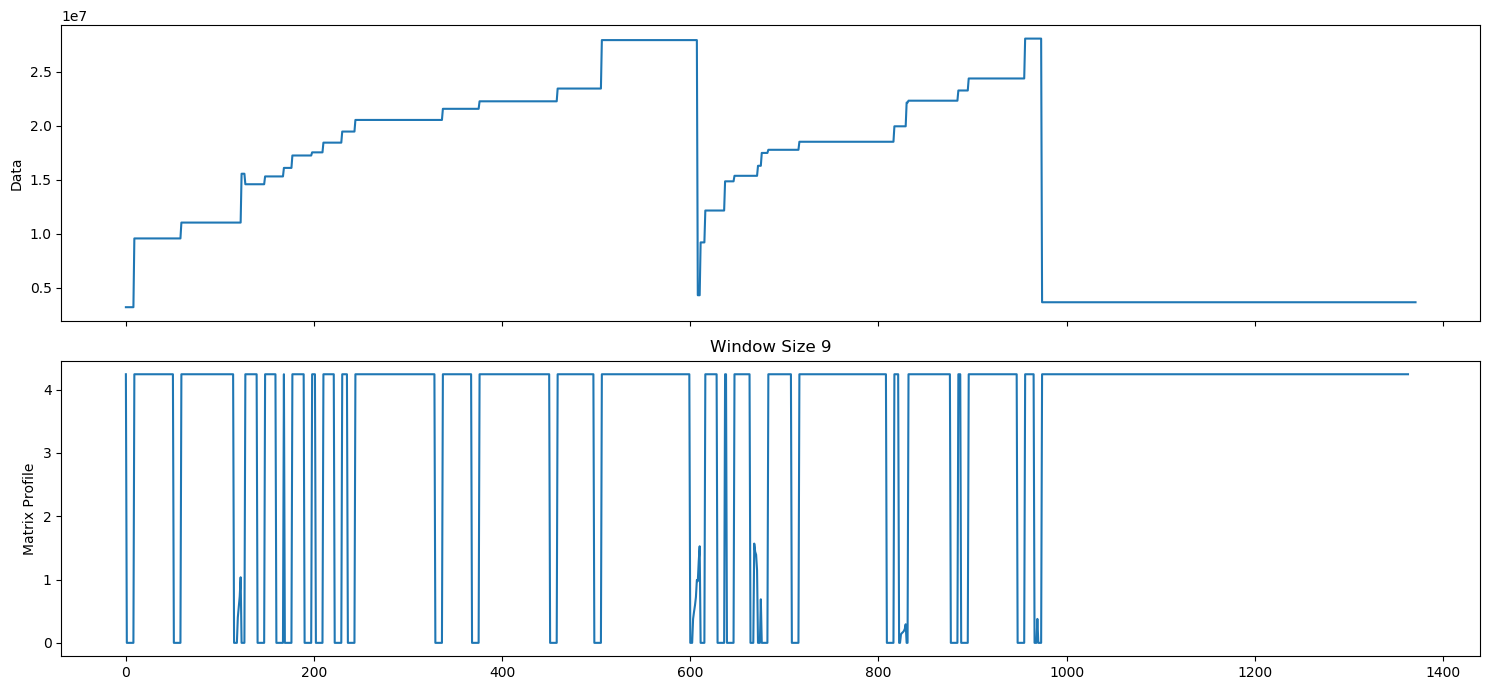

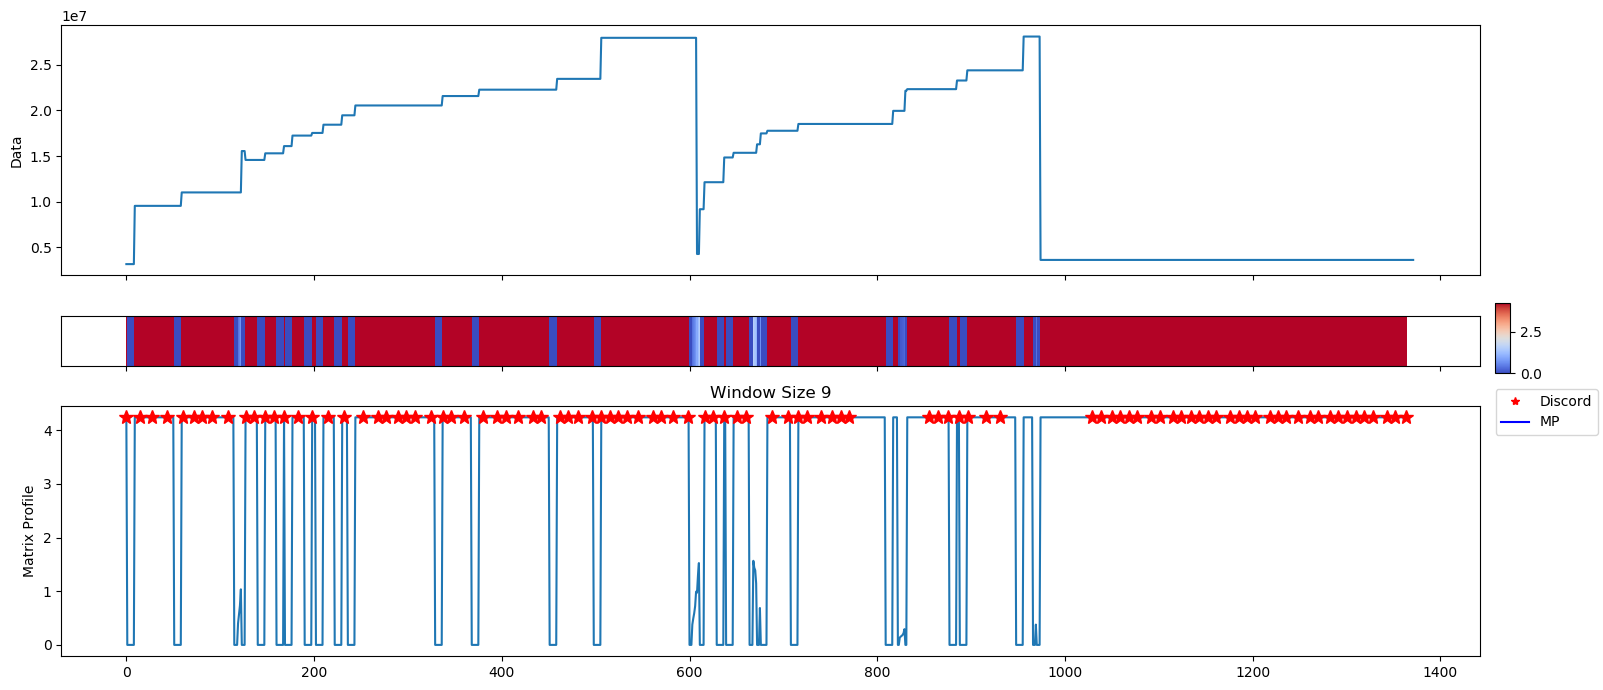

In [49]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matrixprofile as mp

# start a Spark Session
spark = SparkSession.builder.getOrCreate()

# Extract this column as a numpy array
dataset = df_merge['container_memory_max_usage_bytes_value'].values

window_size = 9

k = 100


profile = mp.compute(dataset, window_size)
profile = mp.discover.discords(profile, k = k, exclusion_zone = window_size)
mp.visualize(profile)
plt.show()


In [50]:
# Assuming 'timestamp' is the column in your dataframe which has the time information
timestamp_column = df_merge['timestamp']

# Get the indices of the discords
discord_indices = profile['discords']

# Map the discord indices to their respective timestamps
anomaly_timestamps = timestamp_column[discord_indices]
anomaly_timestamps

1363   2023-06-06 15:57:40
506    2023-06-06 15:57:10
515    2023-06-06 15:57:10
561    2023-06-06 15:57:10
496    2023-06-06 15:56:40
               ...        
887    2023-06-06 15:56:32
875    2023-06-06 15:56:07
865    2023-06-06 15:56:07
855    2023-06-06 15:56:07
916    2023-06-06 15:57:07
Name: timestamp, Length: 100, dtype: datetime64[ns]

In [55]:

df_error = df_error[df_error['log_processed.level']=='WARNING']
df_error['timestamp']


Series([], Name: timestamp, dtype: datetime64[ns])

In [52]:
df_error

,timestamp,container_memory_max_usage_bytes_value,data,date,time,stream,_p,log,kubernetes.pod_name,kubernetes.namespace_name,kubernetes.pod_id,kubernetes.host,kubernetes.container_name,kubernetes.docker_id,kubernetes.container_image,kubernetes.container_hash,log_processed.time,log_processed.level,log_processed.msg,log_processed.t.$date,log_processed.s,log_processed.c,log_processed.id,log_processed.ctx,log_processed.attr.remote,log_processed.attr.uuid,log_processed.attr.connectionId,log_processed.attr.connectionCount,log_processed.attr.opId,log_processed.attr.client,log_processed.attr.doc.driver.name,log_processed.attr.doc.driver.version,log_processed.attr.doc.os.type,log_processed.attr.doc.os.name,log_processed.attr.doc.os.architecture,log_processed.attr.doc.os.version,log_processed.attr.doc.platform,log_processed.attr.doc.version,log_processed.attr.doc.application.name,log_processed.attr.message,log_processed.attr.type,log_processed.attr.ns,log_processed.attr.command.find,log_processed.attr.command.filter.imsi,log_processed.attr.command.$db,log_processed.attr.command.lsid.id.$uuid,log_processed.attr.planSummary,log_processed.attr.keysExamined,log_processed.attr.docsExamined,log_processed.attr.cursorExhausted,log_processed.attr.numYields,log_processed.attr.nreturned,log_processed.attr.queryHash,log_processed.attr.planCacheKey,log_processed.attr.reslen,log_processed.attr.locks.FeatureCompatibilityVersion.acquireCount.r,log_processed.attr.locks.Global.acquireCount.r,log_processed.attr.locks.Mutex.acquireCount.r,log_processed.attr.protocol,log_processed.attr.durationMillis
0,2023-06-06 15:47:27,3174400.0,"{'date': '2023-06-06T15:47:27.444489Z', 'time'...",2023-06-06T15:47:27.444489Z,2023-06-06T15:47:27.444489594Z,stderr,F,Open5GS daemon v2.4.11,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-06 15:47:27,3174400.0,"{'date': '2023-06-06T15:47:27.444524Z', 'time'...",2023-06-06T15:47:27.444524Z,2023-06-06T15:47:27.444524569Z,stderr,F,,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-06-06 15:47:27,3174400.0,"{'date': '2023-06-06T15:47:27.448808Z', 'time'...",2023-06-06T15:47:27.448808Z,2023-06-06T15:47:27.44880817Z,stderr,F,[32m06/06 15:47:27.448[0m: [[33mapp[0m] [...,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-06 15:47:27,3174400.0,"{'date': '2023-06-06T15:47:27.568625Z', 'time'...",2023-06-06T15:47:27.568625Z,2023-06-06T15:47:27.56862546Z,stderr,F,[32m06/06 15:47:27.568[0m: [[33mmetrics[0m...,open5gs-amf-54cc5d554b-pjq4v,openverso,4cc4bf41-eaba-43b4-8fd4-00a41fe807e0,ip-10-0-115-68.ec2.internal,open5gs-amf,0e519ee37b5c8f49eeef4aaf8b45276f0e84199c7c1fd1...,docker.io/openverso/open5gs:2.4.11,docker.io/openverso/open5gs@sha256:d23cc81f47b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [67]:
from sklearn.metrics import confusion_matrix
given_anomaly = df_error['timestamp'].tolist()
predicted_anomaly =anomaly_timestamps.tolist()   


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


[Timestamp('2023-06-06 15:57:40'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:56:40'),
 Timestamp('2023-06-06 15:56:40'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:56:09'),
 Timestamp('2023-06-06 15:56:09'),
 Timestamp('2023-06-06 15:56:09'),
 Timestamp('2023-06-06 15:56:40'),
 Timestamp('2023-06-06 15:56:40'),
 Timestamp('2023-06-06 15:56:09'),
 Timestamp('2023-06-06 15:53:42'),
 Timestamp('2023-06-06 15:54:10'),
 Timestamp('2023-06-06 15:54:10'),
 Timestamp('2023-06-06 15:53:42'),
 Timestamp('2023-06-06 15:54:10'),
 Timestamp('2023-06-06 15:54:10'),
 Timestamp('2023-06-06 15:54:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:57:10'),
 Timestamp('2023-06-06 15:50:29'),
 Timestamp('2023-06-06 15:51:25'),
 Timestamp('2023-06-06 15:51:25'),
 Timestamp('2023-06-

In [68]:
all_timestamps = pd.Series(actual_anomaly_timestamps.tolist() + predicted_anomaly_timestamps.tolist()).unique()

df = pd.DataFrame(index=all_timestamps)

df['actual'] = 0
df['predicted'] = 0

df.loc[df.index.isin(actual_anomaly_timestamps), 'actual'] = 1
df.loc[df.index.isin(predicted_anomaly_timestamps), 'predicted'] = 1

tn, fp, fn, tp = confusion_matrix(df['actual'], df['predicted']).ravel()

print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


True Positives: 0
False Positives: 32
True Negatives: 0
False Negatives: 0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score

# Calculate accuracy
accuracy = accuracy_score(df['actual'], df['predicted'])
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(df['actual'], df['predicted'])
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(df['actual'], df['predicted'])
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(df['actual'], df['predicted'])
print(f'F1 Score: {f1}')

# Calculate F2 score
f2 = fbeta_score(df['actual'], df['predicted'], beta=2)
print(f'F2 Score: {f2}')
